In [3]:
import re
import pandas as pd

In [4]:
f = open('WhatsApp Chat with ShArEeF PeEpS.txt','r',encoding='utf-8')

In [5]:
data = f.read()

In [6]:
print(data)

06/07/2023, 10:26 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
06/01/2023, 9:14 pm - Abdullah Khan -tuf created group "Naik Log 🫡"
06/07/2023, 10:26 pm - Saud Sattar Uni added you
06/07/2023, 10:27 pm - Saud Sattar Uni: <Media omitted>
06/07/2023, 10:28 pm - Saud Sattar Uni: <Media omitted>
06/07/2023, 10:28 pm - Saud Sattar Uni: Yahan pr sirf naik batain hon gi haina Abdullah 🌝
06/07/2023, 10:28 pm - Abdullah Khan -tuf added Abdul Ahad SE and Tabish
06/07/2023, 10:28 pm - Abdullah Khan -tuf: 🫡
06/07/2023, 10:29 pm - Saud Sattar Uni: <Media omitted>
06/07/2023, 10:29 pm - Saud Sattar Uni: 😂
06/07/2023, 10:29 pm - Abdullah Khan -tuf changed this group's icon
06/07/2023, 10:30 pm - Arslan: <Media omitted>
06/07/2023, 10:31 pm - Saud Sattar Uni: <Media omitted>
06/07/2023, 10:31 pm - ABUبAKAR🌚: 🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻
06/07/2023, 10:32 pm - Saud Sattar Uni: Beta in 5 fingers ko mila k bi tera nhi banna


In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s?[ap]m\s-\s'

In [7]:
messages = re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Abdullah Khan -tuf created group "Naik Log 🫡"\n',
 'Saud Sattar Uni added you\n',
 'Saud Sattar Uni: <Media omitted>\n',
 'Saud Sattar Uni: <Media omitted>\n',
 'Saud Sattar Uni: Yahan pr sirf naik batain hon gi haina Abdullah 🌝\n',
 'Abdullah Khan -tuf added Abdul Ahad SE and Tabish\n',
 'Abdullah Khan -tuf: 🫡\n',
 'Saud Sattar Uni: <Media omitted>\n',
 'Saud Sattar Uni: 😂\n',
 "Abdullah Khan -tuf changed this group's icon\n",
 'Arslan: <Media omitted>\n',
 'Saud Sattar Uni: <Media omitted>\n',
 'ABUبAKAR🌚: 🖕🏻🖕🏻🖕🏻🖕🏻🖕🏻\n',
 'Saud Sattar Uni: Beta in 5 fingers ko mila k bi tera nhi banna\n',
 'Saud Sattar Uni: Jitni tuny send kr di hain\n',
 'Saud Sattar Uni: Aution waly\n',
 'Saud Sattar Uni: Antion\n',
 'Saud Sattar Uni: Auntion🌝\n',
 'Abdullah Khan -tuf: <Media omitted>\n',
 'ABUبAKAR🌚: Ye mana send ke thi Pagal\n',
 'ABUبAKAR🌚: 🫡\n',
 'A

In [8]:
len(messages)

14687

In [9]:
dates = re.findall(pattern,data)

dates = [item.replace('\u202f', ' ') for item in dates]

dates = [item.replace(' - ', '') for item in dates]



In [10]:
dates

['06/07/2023, 10:26 pm',
 '06/01/2023, 9:14 pm',
 '06/07/2023, 10:26 pm',
 '06/07/2023, 10:27 pm',
 '06/07/2023, 10:28 pm',
 '06/07/2023, 10:28 pm',
 '06/07/2023, 10:28 pm',
 '06/07/2023, 10:28 pm',
 '06/07/2023, 10:29 pm',
 '06/07/2023, 10:29 pm',
 '06/07/2023, 10:29 pm',
 '06/07/2023, 10:30 pm',
 '06/07/2023, 10:31 pm',
 '06/07/2023, 10:31 pm',
 '06/07/2023, 10:32 pm',
 '06/07/2023, 10:32 pm',
 '06/07/2023, 10:32 pm',
 '06/07/2023, 10:33 pm',
 '06/07/2023, 10:33 pm',
 '06/07/2023, 10:33 pm',
 '06/07/2023, 10:38 pm',
 '06/07/2023, 10:38 pm',
 '06/07/2023, 10:38 pm',
 '06/07/2023, 10:39 pm',
 '06/07/2023, 10:42 pm',
 '06/07/2023, 10:43 pm',
 '06/07/2023, 10:44 pm',
 '06/07/2023, 11:04 pm',
 '06/07/2023, 11:05 pm',
 '06/07/2023, 11:09 pm',
 '06/07/2023, 11:09 pm',
 '06/07/2023, 11:12 pm',
 '06/07/2023, 11:14 pm',
 '06/07/2023, 11:16 pm',
 '07/07/2023, 8:38 pm',
 '07/07/2023, 8:38 pm',
 '07/07/2023, 8:38 pm',
 '07/07/2023, 8:40 pm',
 '07/07/2023, 8:40 pm',
 '07/07/2023, 8:42 pm',
 '07/07

In [11]:


df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Convert 'message_date' to datetime without stripping 'am/pm'
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M %p')

# Rename column
df.rename(columns={'message_date': 'date'}, inplace=True)
df['date'] = df['date'].dt.strftime('%Y-%m-%d %I:%M:%S %p')




In [12]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-07-06 10:26:00 PM
1,"Abdullah Khan -tuf created group ""Naik Log 🫡""\n",2023-01-06 09:14:00 PM
2,Saud Sattar Uni added you\n,2023-07-06 10:26:00 PM
3,Saud Sattar Uni: <Media omitted>\n,2023-07-06 10:27:00 PM
4,Saud Sattar Uni: <Media omitted>\n,2023-07-06 10:28:00 PM


In [13]:
df.shape

(14687, 2)

In [14]:
users = []
messages = []

for message in df['user_message']:
     entry = re.split('([\w\W]+?):\s',message)
     if entry[1:]:
         users.append(entry[1])
         messages.append(entry[2])
     else:
         users.append('group_notification')
         messages.append(entry[0])

df['user'] =users
df['message'] = messages

df.drop(columns=['user_message'],inplace=True)

      

In [15]:
df.head()

,date,user,message
0,2023-07-06 10:26:00 PM,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-01-06 09:14:00 PM,group_notification,"Abdullah Khan -tuf created group ""Naik Log 🫡""\n"
2,2023-07-06 10:26:00 PM,group_notification,Saud Sattar Uni added you\n
3,2023-07-06 10:27:00 PM,Saud Sattar Uni,<Media omitted>\n
4,2023-07-06 10:28:00 PM,Saud Sattar Uni,<Media omitted>\n


In [16]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year
df['year'] = df['date'].dt.year

C:\Users\abuba\AppData\Local\Temp\ipykernel_11000\2337550007.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [17]:
df.head()

,date,user,message,year
0,2023-07-06 22:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023
1,2023-01-06 21:14:00,group_notification,"Abdullah Khan -tuf created group ""Naik Log 🫡""\n",2023
2,2023-07-06 22:26:00,group_notification,Saud Sattar Uni added you\n,2023
3,2023-07-06 22:27:00,Saud Sattar Uni,<Media omitted>\n,2023
4,2023-07-06 22:28:00,Saud Sattar Uni,<Media omitted>\n,2023


In [18]:
df['month'] = df['date'].dt.month_name()

In [19]:
df['day'] = df['date'].dt.day

In [20]:
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['time_of_day'] = df['date'].dt.strftime('%p')

In [21]:
df.head()

,date,user,message,year,month,day,hour,minute,time_of_day
0,2023-07-06 22:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,July,6,22,26,PM
1,2023-01-06 21:14:00,group_notification,"Abdullah Khan -tuf created group ""Naik Log 🫡""\n",2023,January,6,21,14,PM
2,2023-07-06 22:26:00,group_notification,Saud Sattar Uni added you\n,2023,July,6,22,26,PM
3,2023-07-06 22:27:00,Saud Sattar Uni,<Media omitted>\n,2023,July,6,22,27,PM
4,2023-07-06 22:28:00,Saud Sattar Uni,<Media omitted>\n,2023,July,6,22,28,PM


In [22]:
df[ df['user']=='ABUبAKAR🌚' ].shape[0]

3187

In [23]:
words = []
for message in df['message']:
    words.extend(message.split())

In [24]:
len(words)

53367

In [25]:
from urlextract import URLExtract

extractor = URLExtract()

link = []

for message in df['message']:
     link.extend(extractor.find_urls(message))
    

In [26]:
len(link)

46

In [27]:
df

,date,user,message,year,month,day,hour,minute,time_of_day
0,2023-07-06 22:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,July,6,22,26,PM
1,2023-01-06 21:14:00,group_notification,"Abdullah Khan -tuf created group ""Naik Log 🫡""\n",2023,January,6,21,14,PM
2,2023-07-06 22:26:00,group_notification,Saud Sattar Uni added you\n,2023,July,6,22,26,PM
3,2023-07-06 22:27:00,Saud Sattar Uni,<Media omitted>\n,2023,July,6,22,27,PM
4,2023-07-06 22:28:00,Saud Sattar Uni,<Media omitted>\n,2023,July,6,22,28,PM
...,...,...,...,...,...,...,...,...,...
14682,2024-08-12 21:34:00,Ahmad Afzal,null\n,2024,August,12,21,34,PM
14683,2024-08-15 17:14:00,Saud Sattar Uni,Kya plan suba ka\n,2024,August,15,17,14,PM
14684,2024-08-15 17:15:00,Saud Sattar Uni,Goiz\n,2024,August,15,17,15,PM
14685,2024-08-16 12:21:00,Arslan,anddd sy mandd sy asim muneer mery landd syy\n,2024,August,16,12,21,PM


In [28]:
x = df['user'].value_counts().head()
x

user
Abdul Ahad SE         3594
ABUبAKAR🌚             3187
Saud Sattar Uni       2891
Abdullah Khan -tuf    2750
Tabish                1055
Name: count, dtype: int64

In [29]:
import matplotlib.pyplot as plt

In [30]:
name = x.index
count =  x.values

C:\Users\abuba\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127770 (\N{NEW MOON WITH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


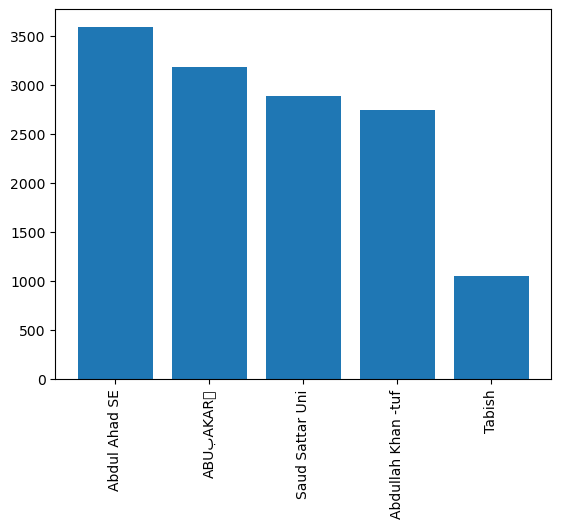

In [31]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
round((df['user'].value_counts().head()/df.shape[0])*100,2).reset_index().rename(columns={'count':'percent','user':'name'})

,name,percent
0,Abdul Ahad SE,24.47
1,ABUبAKAR🌚,21.70
2,Saud Sattar Uni,19.68
3,Abdullah Khan -tuf,18.72
4,Tabish,7.18


In [33]:
temp=df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [34]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [37]:
words = []
for message in temp['message']:
    message = message.translate(str.maketrans('', '', string.punctuation))
    for word in message.lower().split():
        if word not in stop_words and not re.search(r'\d', word):
            words.append(word)


In [38]:
import string

In [39]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,yar,432
1,sy,277
2,hn,161
3,message,142
4,gya,137
5,bakar,124
6,deleted,105
7,paper,99
8,😂,98
9,send,95


In [40]:
!pip install emoji

In [41]:
import emoji

In [42]:
import emoji

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])


In [43]:
emoji_df= pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

<BarContainer object of 5 artists>

C:\Users\abuba\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  func(*args, **kwargs)
C:\Users\abuba\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129296 (\N{ZIPPER-MOUTH FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\abuba\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abuba\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129296 (\N{ZIPPER-MOUTH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


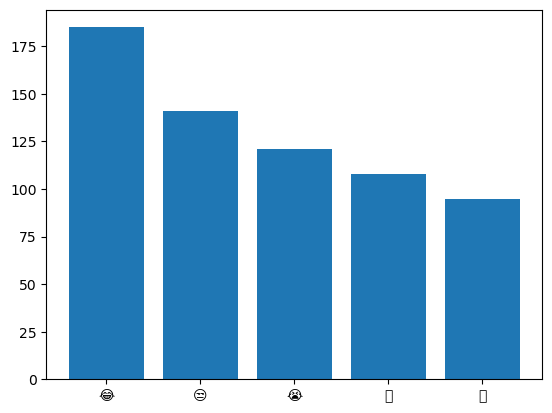

In [44]:
plt.bar(emoji_df[0].head(),emoji_df[1].head())

In [45]:
df['month_num'] = df['date'].dt.month

In [46]:
df

,date,user,message,year,month,day,hour,minute,time_of_day,month_num
0,2023-07-06 22:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,July,6,22,26,PM,7
1,2023-01-06 21:14:00,group_notification,"Abdullah Khan -tuf created group ""Naik Log 🫡""\n",2023,January,6,21,14,PM,1
2,2023-07-06 22:26:00,group_notification,Saud Sattar Uni added you\n,2023,July,6,22,26,PM,7
3,2023-07-06 22:27:00,Saud Sattar Uni,<Media omitted>\n,2023,July,6,22,27,PM,7
4,2023-07-06 22:28:00,Saud Sattar Uni,<Media omitted>\n,2023,July,6,22,28,PM,7
...,...,...,...,...,...,...,...,...,...,...
14682,2024-08-12 21:34:00,Ahmad Afzal,null\n,2024,August,12,21,34,PM,8
14683,2024-08-15 17:14:00,Saud Sattar Uni,Kya plan suba ka\n,2024,August,15,17,14,PM,8
14684,2024-08-15 17:15:00,Saud Sattar Uni,Goiz\n,2024,August,15,17,15,PM,8
14685,2024-08-16 12:21:00,Arslan,anddd sy mandd sy asim muneer mery landd syy\n,2024,August,16,12,21,PM,8


In [47]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [48]:
timeline

,year,month_num,month,message
0,2023,1,January,1
1,2023,7,July,362
2,2023,8,August,4627
3,2023,9,September,952
4,2023,10,October,2008
5,2023,11,November,1940
6,2023,12,December,999
7,2024,1,January,1010
8,2024,2,February,196
9,2024,3,March,793


In [49]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [50]:
timeline['time'] = time

In [51]:
timeline

,year,month_num,month,message,time
0,2023,1,January,1,January-2023
1,2023,7,July,362,July-2023
2,2023,8,August,4627,August-2023
3,2023,9,September,952,September-2023
4,2023,10,October,2008,October-2023
5,2023,11,November,1940,November-2023
6,2023,12,December,999,December-2023
7,2024,1,January,1010,January-2024
8,2024,2,February,196,February-2024
9,2024,3,March,793,March-2024


<function matplotlib.pyplot.show(close=None, block=None)>

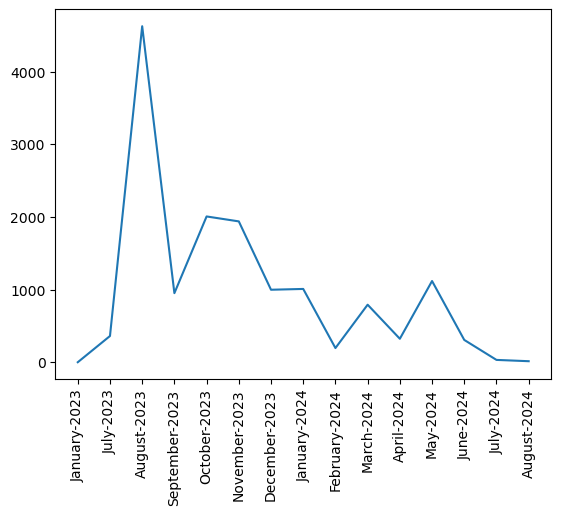

In [52]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show

In [53]:
df['only_date']=df['date'].dt.date

In [54]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [55]:
daily_timeline

,only_date,message
0,2023-01-06,1
1,2023-07-06,33
2,2023-07-07,7
3,2023-07-08,14
4,2023-07-10,19
...,...,...
292,2024-08-07,4
293,2024-08-08,1
294,2024-08-12,2
295,2024-08-15,2


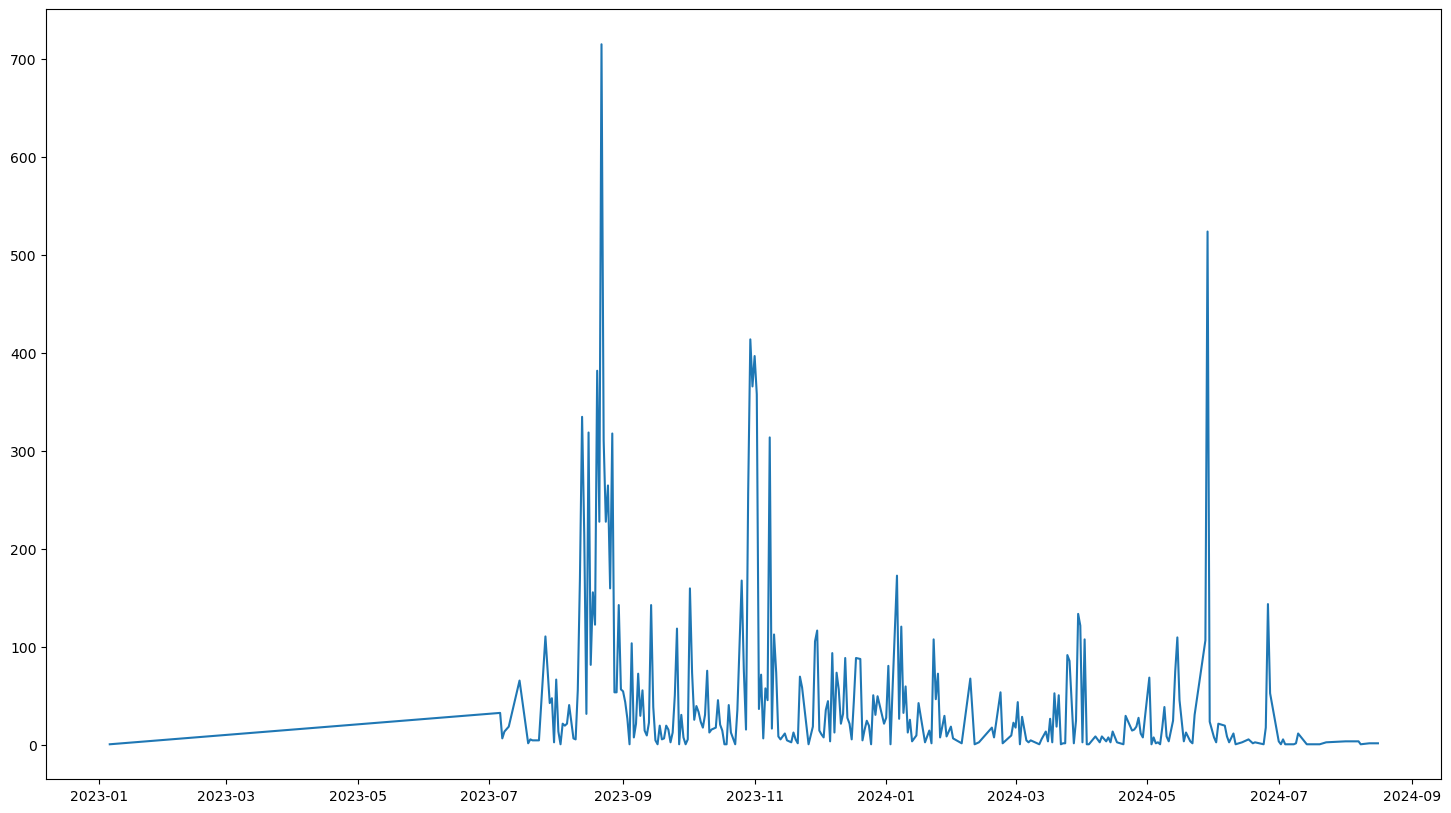

In [56]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])


In [57]:
df.head()

,date,user,message,year,month,day,hour,minute,time_of_day,month_num,only_date
0,2023-07-06 22:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,July,6,22,26,PM,7,2023-07-06
1,2023-01-06 21:14:00,group_notification,"Abdullah Khan -tuf created group ""Naik Log 🫡""\n",2023,January,6,21,14,PM,1,2023-01-06
2,2023-07-06 22:26:00,group_notification,Saud Sattar Uni added you\n,2023,July,6,22,26,PM,7,2023-07-06
3,2023-07-06 22:27:00,Saud Sattar Uni,<Media omitted>\n,2023,July,6,22,27,PM,7,2023-07-06
4,2023-07-06 22:28:00,Saud Sattar Uni,<Media omitted>\n,2023,July,6,22,28,PM,7,2023-07-06


In [58]:
df['day_name'] = df['date'].dt.day_name()

In [59]:
df.sample(10)

,date,user,message,year,month,day,hour,minute,time_of_day,month_num,only_date,day_name
8461,2023-11-02 11:39:00,Abdullah Khan -tuf,discount bi kraya sir ny\n,2023,November,2,11,39,AM,11,2023-11-02,Thursday
9104,2023-11-08 21:00:00,Arslan,<Media omitted>\n,2023,November,8,21,0,PM,11,2023-11-08,Wednesday
2454,2023-08-20 23:41:00,Abdullah Khan -tuf,Bhot jldi bhej diye\n,2023,August,20,23,41,PM,8,2023-08-20,Sunday
4406,2023-08-27 11:17:00,Tabish,durust farmaya apne saud bhai\n,2023,August,27,11,17,AM,8,2023-08-27,Sunday
5354,2023-09-10 00:20:00,Abdul Ahad SE,<Media omitted>\n,2023,September,10,0,20,AM,9,2023-09-10,Sunday
14320,2024-05-30 11:28:00,Abdul Ahad SE,<Media omitted>\n,2024,May,30,11,28,AM,5,2024-05-30,Thursday
8589,2023-11-02 21:42:00,Abdullah Khan -tuf,Maafi de\n,2023,November,2,21,42,PM,11,2023-11-02,Thursday
5516,2023-09-14 09:53:00,Abdul Ahad SE,Dsso\n,2023,September,14,9,53,AM,9,2023-09-14,Thursday
3351,2023-08-22 22:32:00,Saud Sattar Uni,Official group ka\n,2023,August,22,22,32,PM,8,2023-08-22,Tuesday
14634,2024-06-27 12:44:00,Saud Sattar Uni,<Media omitted>\n,2024,June,27,12,44,PM,6,2024-06-27,Thursday


In [60]:
# period = []
# for hour in df[['day_name','hour']]['hour']:
#     if hour == 23:
#         period.append(str(hour)+ "-" + str('00'))
#     elif hour == 0:
#         period.append(str('00')+ "-" + str(hour+1))
#     else:
#         period.append(str(hour)+ "-" + str(hour+1))

# Create the period list with ascending time order
period = []
for hour in sorted(df['hour'].unique()):
    if hour == 23:
        period.append(str(hour) + "-" + "00")
    elif hour == 0:
        period.append("00" + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

# Add the period column to the DataFrame
df['period'] = df['hour'].apply(lambda x: period[x])

In [61]:
# df['period'] = period

In [62]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,time_of_day,month_num,only_date,day_name,period
2697,2023-08-22 04:38:00,ABUبAKAR🌚,<Media omitted>\n,2023,August,22,4,38,AM,8,2023-08-22,Tuesday,4-5
12370,2024-03-21 21:58:00,ABUبAKAR🌚,Note parh\n,2024,March,21,21,58,PM,3,2024-03-21,Thursday,21-22
6154,2023-10-03 19:52:00,Tabish,<Media omitted>\n,2023,October,3,19,52,PM,10,2023-10-03,Tuesday,19-20
7338,2023-10-30 19:45:00,Abdullah Khan -tuf,Sitamgar ho tum khub pehchanty hn\n,2023,October,30,19,45,PM,10,2023-10-30,Monday,19-20
13211,2024-04-30 20:28:00,Abdul Ahad SE,bcz I aint got nothing call\n,2024,April,30,20,28,PM,4,2024-04-30,Tuesday,20-21


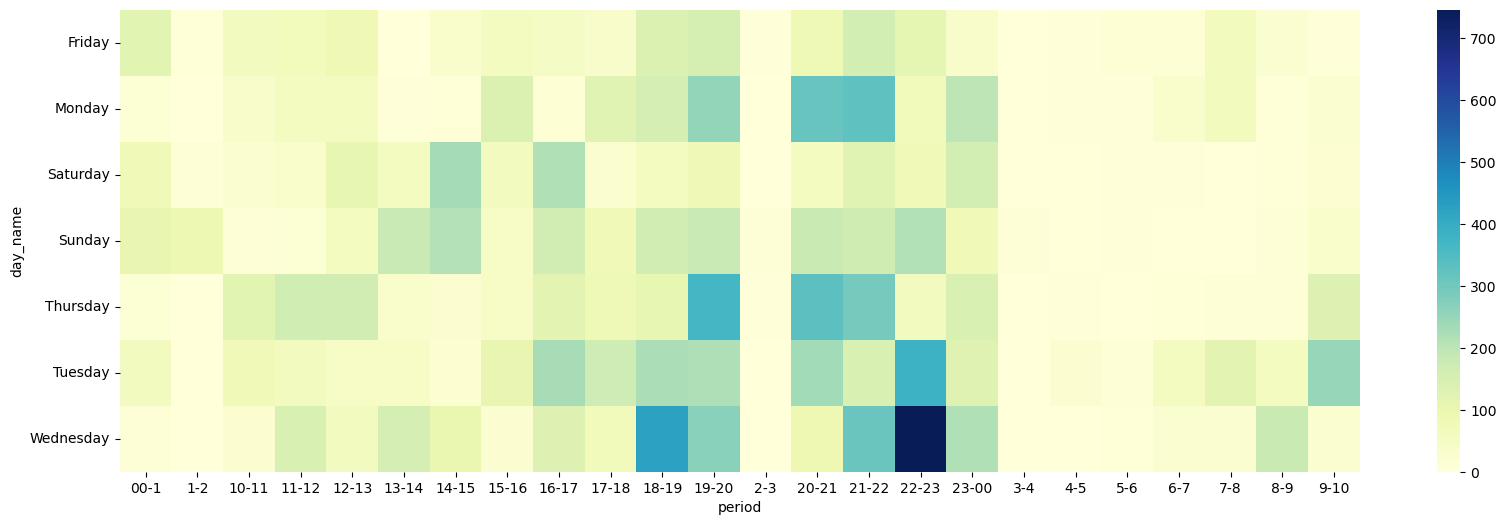

In [64]:
import seaborn as sns 
# plt.figure(figsize=(20,6))
# sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
# plt.yticks(rotation='horizontal')
# plt.show()

plt.figure(figsize=(20, 6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0), cmap="YlGnBu")
plt.yticks(rotation='horizontal')
plt.show()

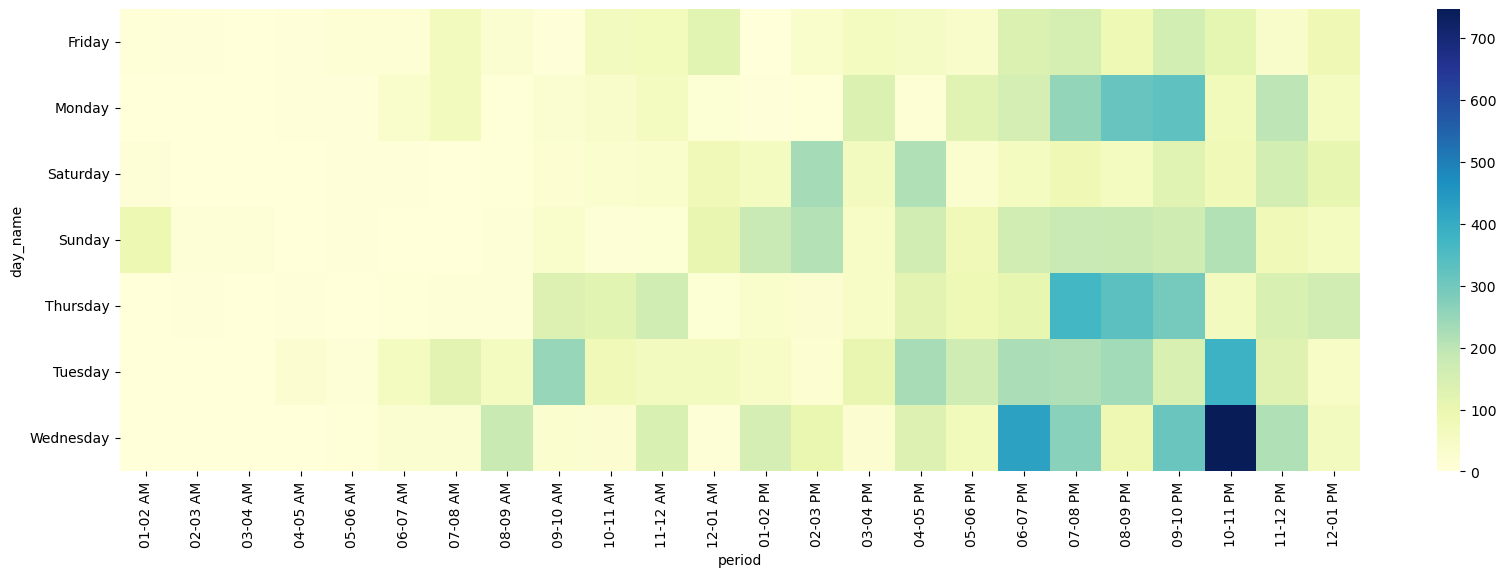

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the period list based on the hour and time of day (AM/PM)
period = []
for hour, time_of_day in zip(df['hour'], df['time_of_day']):
    if hour == 0:
        period.append(f"12-01 {time_of_day}")
    elif hour == 12:
        period.append(f"12-01 {time_of_day}")
    elif hour < 12:
        period.append(f"{hour:02}-{hour+1:02} {time_of_day}")
    else:
        period.append(f"{hour-12:02}-{hour-11:02} {time_of_day}")

# Add the period column to the DataFrame
df['period'] = period

# Create a sort key for time of day (AM before PM) and hour
df['time_sort'] = df['time_of_day'].apply(lambda x: 0 if x == 'AM' else 1)
df['hour_sort'] = df['hour'] % 12  # Convert to 12-hour format for proper sorting

# Sort the DataFrame by time of day and hour
df = df.sort_values(by=['time_sort', 'hour_sort'])

# Reorder periods in the pivot table for AM first
pivot_table = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

# Reorder the columns to ensure AM comes before PM
sorted_columns = sorted(pivot_table.columns, key=lambda x: (x[-2:], int(x.split('-')[0])))
pivot_table = pivot_table[sorted_columns]

# Create the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.yticks(rotation='horizontal')
plt.show()


In [68]:
df

,date,user,message,year,month,day,hour,minute,time_of_day,month_num,only_date,day_name,period,time_sort
360,2023-07-31 00:18:00,Abdul Ahad SE,Caption 🫠\n,2023,July,31,0,18,AM,7,2023-07-31,Monday,12-01 AM,0
361,2023-07-31 00:18:00,Abdul Ahad SE,Bio..\n,2023,July,31,0,18,AM,7,2023-07-31,Monday,12-01 AM,0
362,2023-07-31 00:42:00,Saud Sattar Uni,Itna attitude to abu bakar k pas hi hai\n,2023,July,31,0,42,AM,7,2023-07-31,Monday,12-01 AM,0
430,2023-08-02 00:03:00,Saud Sattar Uni,So gay o\n,2023,August,2,0,3,AM,8,2023-08-02,Wednesday,12-01 AM,0
431,2023-08-02 00:03:00,Abdullah Khan -tuf,Ni\n,2023,August,2,0,3,AM,8,2023-08-02,Wednesday,12-01 AM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14306,2024-05-29 23:46:00,ABUبAKAR🌚,Now Abubakar unblock all of you and now sleep ...,2024,May,29,23,46,PM,5,2024-05-29,Wednesday,23-01 PM,1
14650,2024-07-04 23:58:00,Saud Sattar Uni,https://youtube.com/shorts/eZvePsf0W_A?si=gt2_...,2024,July,4,23,58,PM,7,2024-07-04,Thursday,23-01 PM,1
14663,2024-07-10 23:00:00,Saud Sattar Uni,?\n,2024,July,10,23,0,PM,7,2024-07-10,Wednesday,23-01 PM,1
14664,2024-07-10 23:02:00,Abdul Ahad SE,Rate\n,2024,July,10,23,2,PM,7,2024-07-10,Wednesday,23-01 PM,1
